In [1]:
from jupyter_dash import JupyterDash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.subplots

import numpy as np
import matplotlib.pyplot as plt
import dpx_control_hw as dch

## Settings

In [2]:
CONFIG = '../config.conf'

## Find port and connect

In [4]:
port = dch.find_port()
if port is None:
    port = '/dev/ttyACM0'

dpx = dch.Dosepix(
    port_name=port,
    config_fn=CONFIG,
    thl_calib_fn=None,
    params_fn=None,
    bin_edges_fn=None
)

## Measure THL

OMR set to: 381fc0
{'v_tha': 5269.0, 'v_tpref_fine': 100.0, 'v_tpref_coarse': 50.0, 'i_tpbufout': 128.0, 'i_tpbufin': 128.0, 'i_disc2': 119.0, 'i_disc1': 56.0, 'v_casc_preamp': 130.0, 'v_gnd': 80.0, 'i_preamp': 100.0, 'v_fbk': 200.0, 'i_krum': 11.0, 'i_pixeldac': 60.0, 'v_casc_reset': 220.0}
Measuring ADC!


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8191/8191 [00:04<00:00, 1746.79it/s]


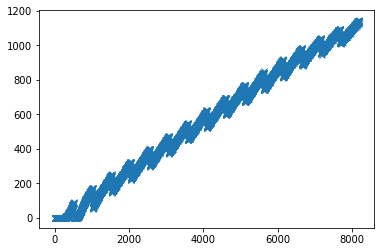

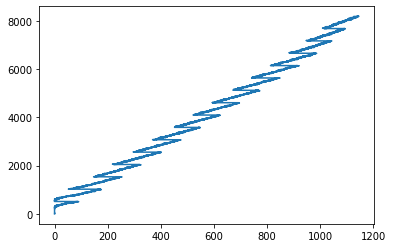

Execution time: 0.08 min


In [6]:
thl_calib_d = dpx.dpm.measure_thl(
    out_fn=None, plot=True)
dpx.set_thl_calib(thl_calib_d)

## Equalization generator

== Threshold equalization ==
OMR set to: b81fc0
Set pixel DACs to 00
Loop over THLs


/home/solvalou/Documents/dosimetry/dpx_control_hw_venv/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:96: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = np.asanyarray(a)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 291/291 [00:02<00:00, 109.40it/s]


Set pixel DACs to 3f
Loop over THLs


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:02<00:00, 108.74it/s]
/home/solvalou/Documents/dosimetry/dpx_control_hw/dpx_control_hw/equalization.py:102: RuntimeWarning: All-NaN axis encountered
  offset = np.nanmax([noise_thl_first, noise_thl_second], axis=0)


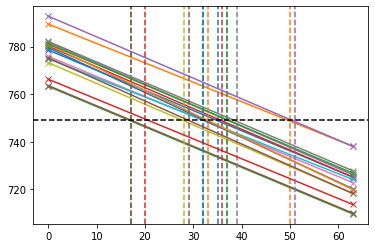

New pixel dac 23321124251120271c2020212514331d33292125181b201e1d0a16211e2020252323212816201e1a16221825261a26291b2f2723272c192c212c270b290c1f2f22202c181922181d231d1e0f230f371f28272727152624181e1b1329111b332620242d181b1f1f2415281e1b26271d27261a192d19282419280a23211d262f232625272a1722001f1b0e1e0024162028312407341f181f182027241f231e2c20241e251729172c22101e21171e1e00271b25202427002618272029262f2027231a2e1e1922272a0b241d2627152222002f2b09251328232625142125262721261530002026261b1728271c122f172e302124191a1d18152000152618251d1d19
Set pixel DACs to 23321124251120271c2020212514331d33292125181b201e1d0a16211e2020252323212816201e1a16221825261a26291b2f2723272c192c212c270b290c1f2f22202c181922181d231d1e0f230f371f28272727152624181e1b1329111b332620242d181b1f1f2415281e1b26271d27261a192d19282419280a23211d262f232625272a1722001f1b0e1e0024162028312407341f181f182027241f231e2c20241e251729172c22101e21171e1e00271b25202427002618272029262f2027231a2e1e1922272a0b241d2627152222002f2b09251328232625142125262721261530002

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [00:02<00:00, 109.06it/s]


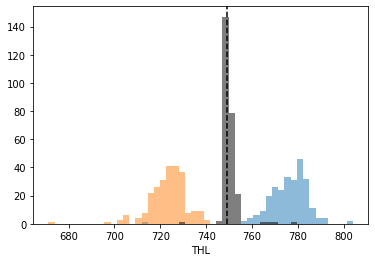

THL: 5252
Pixel DACs: 23321124251120271c2020212514331d33292125181b201e1d0a16211e2020252323212816201e1a16221825261a26291b2f2723272c192c212c270b290c1f2f22202c181922181d231d1e0f230f371f28272727152624181e1b1329111b332620242d181b1f1f2415281e1b26271d27261a192d19282419280a23211d262f232625272a1722001f1b0e1e0024162028312407341f181f182027241f231e2c20241e251729172c22101e21171e1e00271b25202427002618272029262f2027231a2e1e1922272a0b241d2627152222002f2b09251328232625142125262721261530002026261b1728271c122f172e302124191a1d18152000152618251d1d19
Conf mask: 0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [7]:
dpx.equalization(
    CONFIG,
    thl_step=1,
    noise_limit=10,
    n_evals=3,
    num_dacs=2,
    i_pixeldac=60,
    thl_offset=30,
    plot=True
)

## Disconnect

In [8]:
dpx.close()